# [DL] 신경망 (강재영)

# ☑ Deep Learning: 기계가 사람이 학습하는 것과 같이 학습
### · 여러 층을 가진 인공신경망을 사용하여 머신러닝 학습을 수행 (입력 -> 학습과정 -> 출력(결과))
### * 신경망: 인간의 뇌가 가지는 생물학적 특성 중 뉴런의 연결 구조
### * 뉴런: 신경계를 구성하는 세포, 전기적인 신호를 통해 서로 통신하며 정보를 저장


## ✔ 퍼셉트론
### 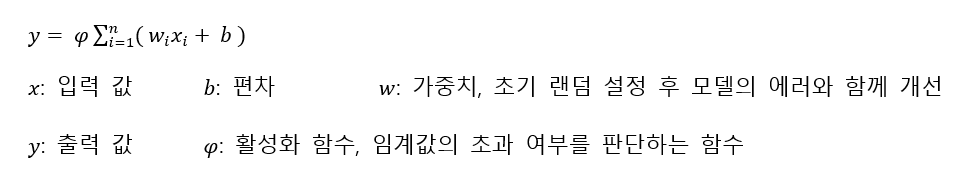
### Input(x)과 Weight(w)로 이루어진 선형 결합의 값에 특정 임계값의 초과 여부를 판단하는 함수를 적용하여
### 출력 값보다 크면 -> 1, 출력 값보다 작으면 -> 0 으로 결과값을 내보내 분류하는 모형              

#### 퍼셉트론이 매개변수 값들을 조절하여, AND, OR, NAND GATE 등의 간단한 논리 회로를 만들 수 있음

In [164]:
# 퍼셉트론을 이용한 AND GATE

import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [165]:
AND(0, 0)

0

In [166]:
AND(1, 0)

0

In [167]:
AND(0, 1)

0

In [168]:
AND(1, 1)

1

In [169]:
# 퍼셉트론을 이용한 NAND, OR GATE

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [170]:
NAND(0, 0)

1

In [171]:
NAND(1, 1)

0

In [172]:
OR (1, 0)

1

### - 퍼셉트론의 한계
### : XOR GATE를 구현하지 못함
#### * XOR GATE (x1과 x2 중 한 쪽이 1일 때만 1을 출력)
### 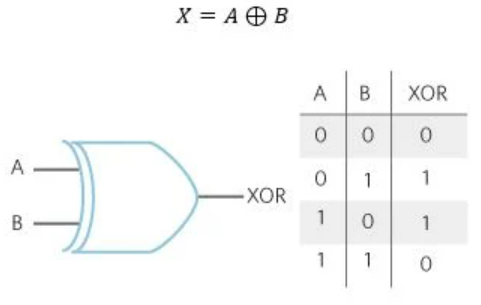
### 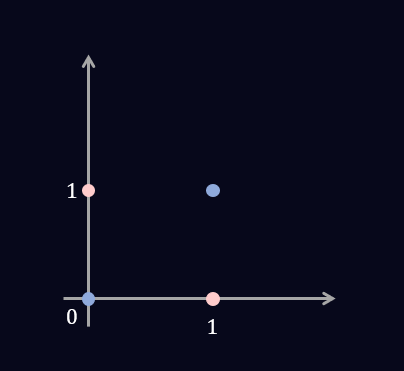
### 위 그림에서 서로 다른 색깔을 하나의 직선을 그어 구분할 수 없음

### ✓ 다층 퍼셉트론
### : 신경망에서 Input Layer과 Output Layer 사이에 Hidden Layer를 추가
### -> XOR GATE 및 복잡한 문제 해결 가능
### 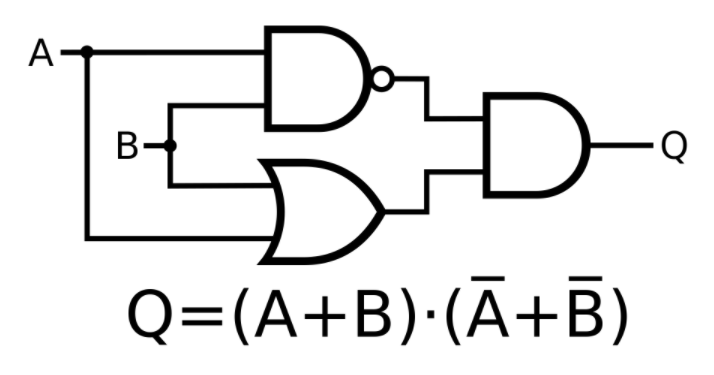

In [173]:
# 다층 퍼셉트론을 이용한 XOR GATE

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [174]:
XOR(0, 0)

0

In [175]:
XOR(1, 0)

1

In [176]:
XOR(0, 1)

1

In [177]:
XOR(1, 1)

0

## ✔ 신경망
### * 신경망의 구조
### 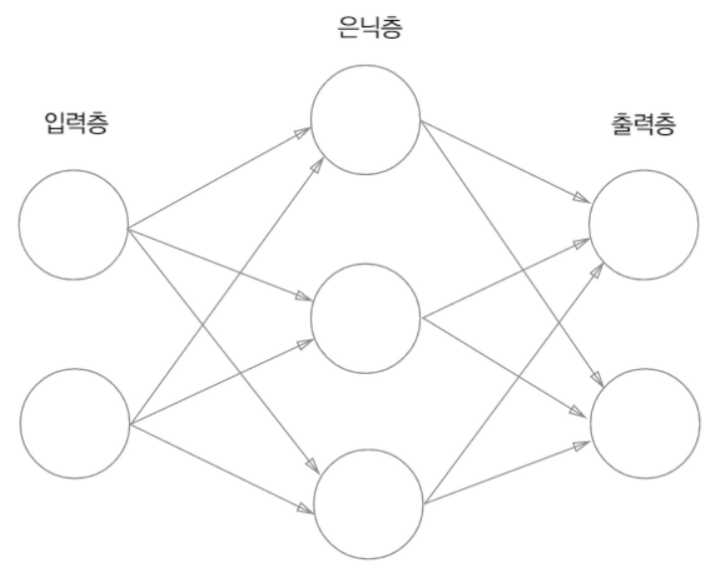

### ✓ 활성화 함수
### : 뉴런으로 들어오는 모든 입력 신호에 가중치를 곱하고 그것들의 합산 값에 편향을 더한 후 뉴런의 흥분 상태를 표시하는 신호로 전환 (입력 신호의 총합이 활성화를 일으키는지를 정하는 역할)
### · 가장 마지막 출력에 관여하며 출력의 형태를 변화시킴
### · Layer들 사이에 존재하며 학습을 도움
### 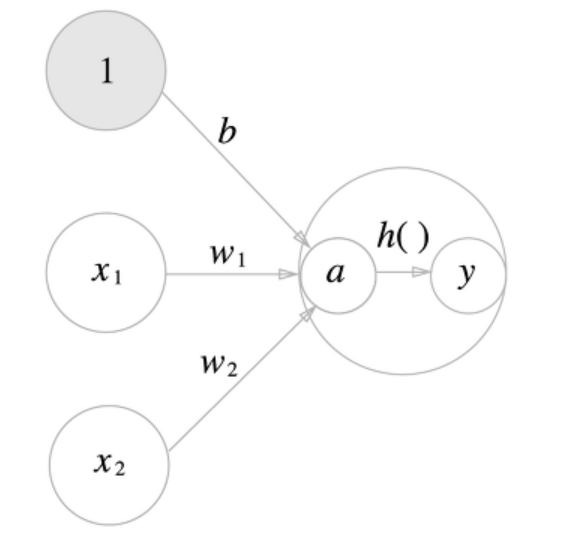

### - 시그모이드 함수 (Sigmoid Function)
### 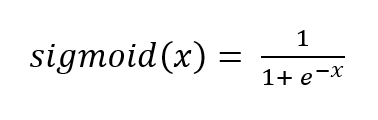
### · 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
### · 미분 가능

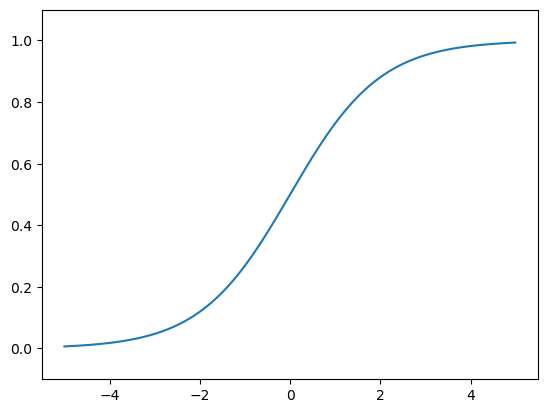

In [178]:
# 시그모이드 함수 구현

import matplotlib.pylab as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.01)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### - 계단 함수 (Step Function)
### 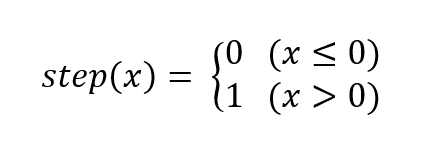
### · 입력이 0을 넘으면 -> 1을 출력, 그 외에는 -> 0을 출력 (binary)
### · 미분 불가능

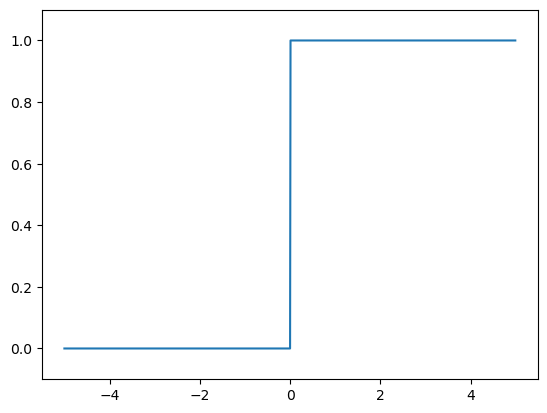

In [179]:
# 계단 함수 구현

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.01)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### - tanh 함수 (Hyperbolic Tangent Function)
### 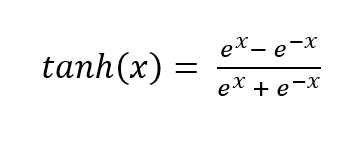
### · 함수의 중심점을 0으로 옮겨 sigmoid function의 학습이 느려지는 단점을 해결
### · 0을 중심으로 대칭 (기함수)

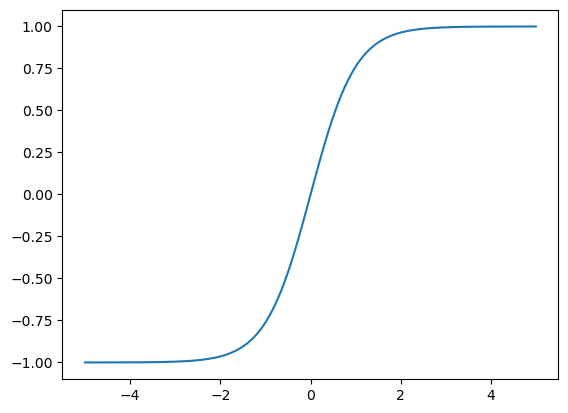

In [180]:
# tanh 함수 구현

def tanh(x):
    return np.tanh(x)

x = np.arange(-5.0, 5.0, 0.01)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### - ReLU 함수 (Rectified Linear Unit, Ramp Function)
### 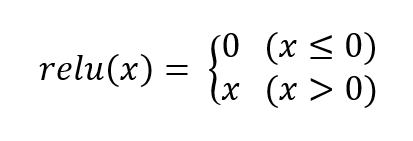
### · 입력이 0을 넘으면 -> 입력 그대로(x) 출력, 그 외에는 -> 0을 출력
### · 연산이 필요없어 빠르지만, 무한하게 커지기 때문에 회생하기 어려움

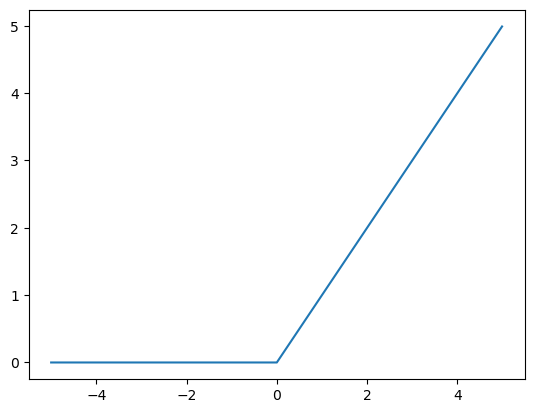

In [181]:
# relu 함수 구현

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.01)
y = relu(x)
plt.plot(x, y)
plt.show()

In [182]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


### - 소프트맥스 함수 (Softmax Function)
### 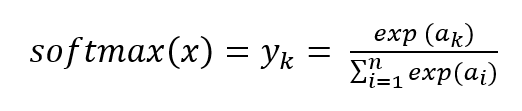
### · n: 출력층의 뉴런 수
### · yk: k번째 출력
### · 소프트맥스 함수의 출력은 '확률' (출력이 항상 0에서 1 사이, 출력의 총합은 1)
### · 일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수를 사용
### · 이중 클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용

In [183]:
# 소프트맥스 함수 구현

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### · 소프트맥스 함수 구현 시 주의점
### 지수 함수를 사용하기 때문에 overflow 위험성
### * 개선 식
### 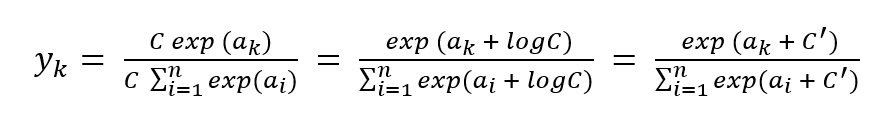
### -> overflow 방지 위해 입력 신호 중 최댓값을 C' 로 이용

In [184]:
# 소프트맥스 함수의 특징
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

## ✔ 순전파 (forward propagation)
### : 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정
### -> 이를 통해 얻은 예측 값(출력 값)으로 실제 값과 예측 값의 차이를 구할 수 있음


## ✔ 역전파 (back propagation)
### : 출력층에서 입력층 방향으로 계산하며 가중치를 업데이트하는 과정
### -> 출력층의 출력 값에 대한 입력층의 입력 값의 기울기를 구할 수 있음

In [185]:
# 손글씨 숫자 인식 (MNIST 데이터셋)
# MNIST 데이터셋: 0~9 의 숫자 이미지(28x28의 크기)로 구성됨

import sys, os
sys.path.append("./dataset")
import pickle
from dataset.mnist import load_mnist

# load_mnist 함수는 MNIST데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환함

# normalize: 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정함
# -> True: 정규화, False: 0~255 (8-bits 경우) 사이 값 그대로 유지
# flatten: 입력 이미지를 평탄하게 할지(1차원 배열로 만들지) 정함
# -> True: 1차원 배열로 저장, False: 3차원 배열로 저장
# one_hot_label: one-hot encoding 형태로 저장할지 정함
# -> True: one-hot encoding 하여 저장, False: 숫자 형태의 레이블 저장

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [186]:
import matplotlib.pylab as plt
import sys, os
sys.path.append("./dataset")
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# flatten = True로 설정한 이미지는 1차원 numpy 배열로 저장됨
# 따라서 이미지의 원래 크기인 28x28 크기로 변환해야 함
# 각 이미지의 픽셀 값은 0~255 범위의 값으로 구성되어 있기 때문에 uint8을 통해 8-bits 이미지로 변환

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [187]:
# MNIST 데이터셋을 통한 신경망 구현

# 신경망의 입력층 뉴런: 784개(28x28=784), 출력층 뉴런: 10개(0~9 사이 숫자 구분 문제)

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# 미리 학습되어 저장된 매개변수 파일을 이용하여 적용
# 첫 번째 은닉층: 50개 뉴런, 두 번째 은닉층: 100개 뉴런
# 'r': 읽기 모드, 'b': binary mode
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [188]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)): # for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류
    y = predict(network, x[i]) # 각 predict 함수는 각 레이블의 확률을 넘파이 배열로 반환
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음 -> 예측 결과
    if p == t[i]:
        accuracy_cnt += 1
 
print("accuracy:" + str(float(accuracy_cnt) / len(x))) # 신경망이 예측한 답과 정답 레이블을 비교, 맞힌 숫자 / 전체 이미지 숫자

accuracy:0.9352
